### 1. Install and import required libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.over_sampling import SMOTE


from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import IsolationForest
from sklearn.ensemble import RandomForestClassifier 
from sklearn.svm import OneClassSVM

from sklearn.model_selection import train_test_split

from sklearn import metrics
from sklearn.metrics import recall_score,classification_report

from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore
from sklearn.decomposition import PCA

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

### 2. Import and explore dataset

In [2]:
df = pd.read_csv("creditcard.csv")

### 3. EDA

In [3]:
# to check the shape
df.shape

(284807, 31)

In [4]:
# to check the list of columns
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
# to check top 5 rows of the dataset
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
# To check null values
df.isnull().sum().max()

0

In [8]:
# to check duplicate rows
df[df.duplicated()]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
33,26.0,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,...,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0
35,26.0,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,...,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0
113,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
114,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
115,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282987,171288.0,1.912550,-0.455240,-1.750654,0.454324,2.089130,4.160019,-0.881302,1.081750,1.022928,...,-0.524067,-1.337510,0.473943,0.616683,-0.283548,-1.084843,0.073133,-0.036020,11.99,0
283483,171627.0,-1.464380,1.368119,0.815992,-0.601282,-0.689115,-0.487154,-0.303778,0.884953,0.054065,...,0.287217,0.947825,-0.218773,0.082926,0.044127,0.639270,0.213565,0.119251,6.82,0
283485,171627.0,-1.457978,1.378203,0.811515,-0.603760,-0.711883,-0.471672,-0.282535,0.880654,0.052808,...,0.284205,0.949659,-0.216949,0.083250,0.044944,0.639933,0.219432,0.116772,11.93,0
284191,172233.0,-2.667936,3.160505,-3.355984,1.007845,-0.377397,-0.109730,-0.667233,2.309700,-1.639306,...,0.391483,0.266536,-0.079853,-0.096395,0.086719,-0.451128,-1.183743,-0.222200,55.66,0


In [9]:
# to drop duplicate rows
df.drop_duplicates(inplace=True, keep='first')

In [10]:
# dataset shape after removing duplicate rows
df.shape

(283726, 31)

<Axes: >

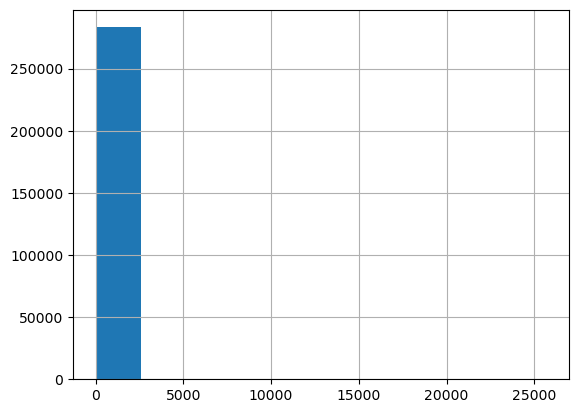

In [11]:
# plot histogram and boxplot of amount column
df.Amount.hist()

<Axes: >

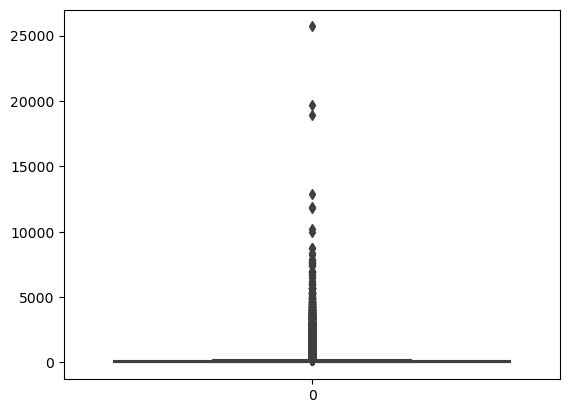

In [12]:
sns.boxplot(df.Amount)

In [13]:
# data distribution looks skewed, lets check list of rows having amount >= 10000
# df[df.Amount>=10000]
# remove rows having Amount>=10000
# df = df[df.Amount<10000]

###  Check class distribution of label column

In [13]:
df.Class.value_counts(normalize=True)

Class
0    0.998333
1    0.001667
Name: proportion, dtype: float64

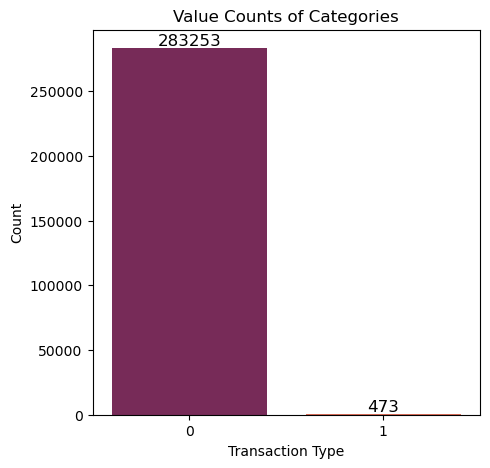

In [14]:
value_counts = df.Class.value_counts()

plt.figure(figsize=(5, 5))
sns.countplot(df, x='Class', palette='rocket')

# Add count labels on top of each bar
for i, count in enumerate(value_counts):
    plt.text(i, count + 0.5, str(count), ha='center', va='bottom', fontsize=12)

plt.title('Value Counts of Categories')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

From above graph we can say that our data is highly imbalanced .

Finding out the avg amount in our both the data set

In [15]:
fraud_people = df[df['Class']==1]
normal_people = df[df['Class']==0]

In [16]:
fraud_people['Amount'].describe()

count     473.000000
mean      123.871860
std       260.211041
min         0.000000
25%         1.000000
50%         9.820000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [17]:
normal_people['Amount'].describe()

count    283253.000000
mean         88.413575
std         250.379023
min           0.000000
25%           5.670000
50%          22.000000
75%          77.460000
max       25691.160000
Name: Amount, dtype: float64

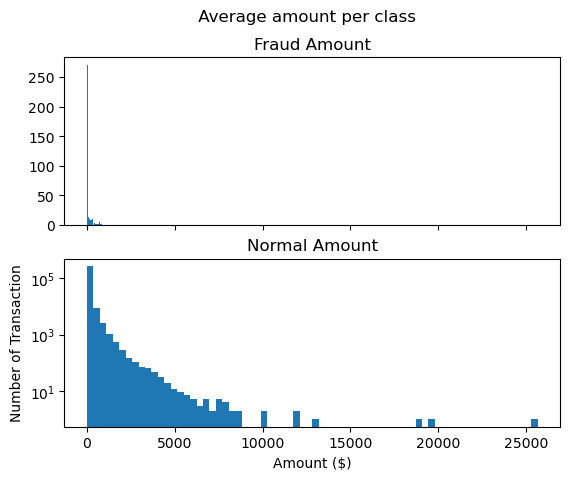

In [18]:
graph, (plot1,plot2) = plt.subplots(2,1, sharex=True)
graph.suptitle(' Average amount per class')
bins = 70

plot1.hist(fraud_people['Amount'], bins=bins)
plot1.set_title('Fraud Amount')

plot2.hist(normal_people['Amount'], bins = bins)
plot2.set_title('Normal Amount')

plt.xlabel('Amount ($)')
plt.ylabel('Number of Transaction')
plt.yscale('log')
plt.show();

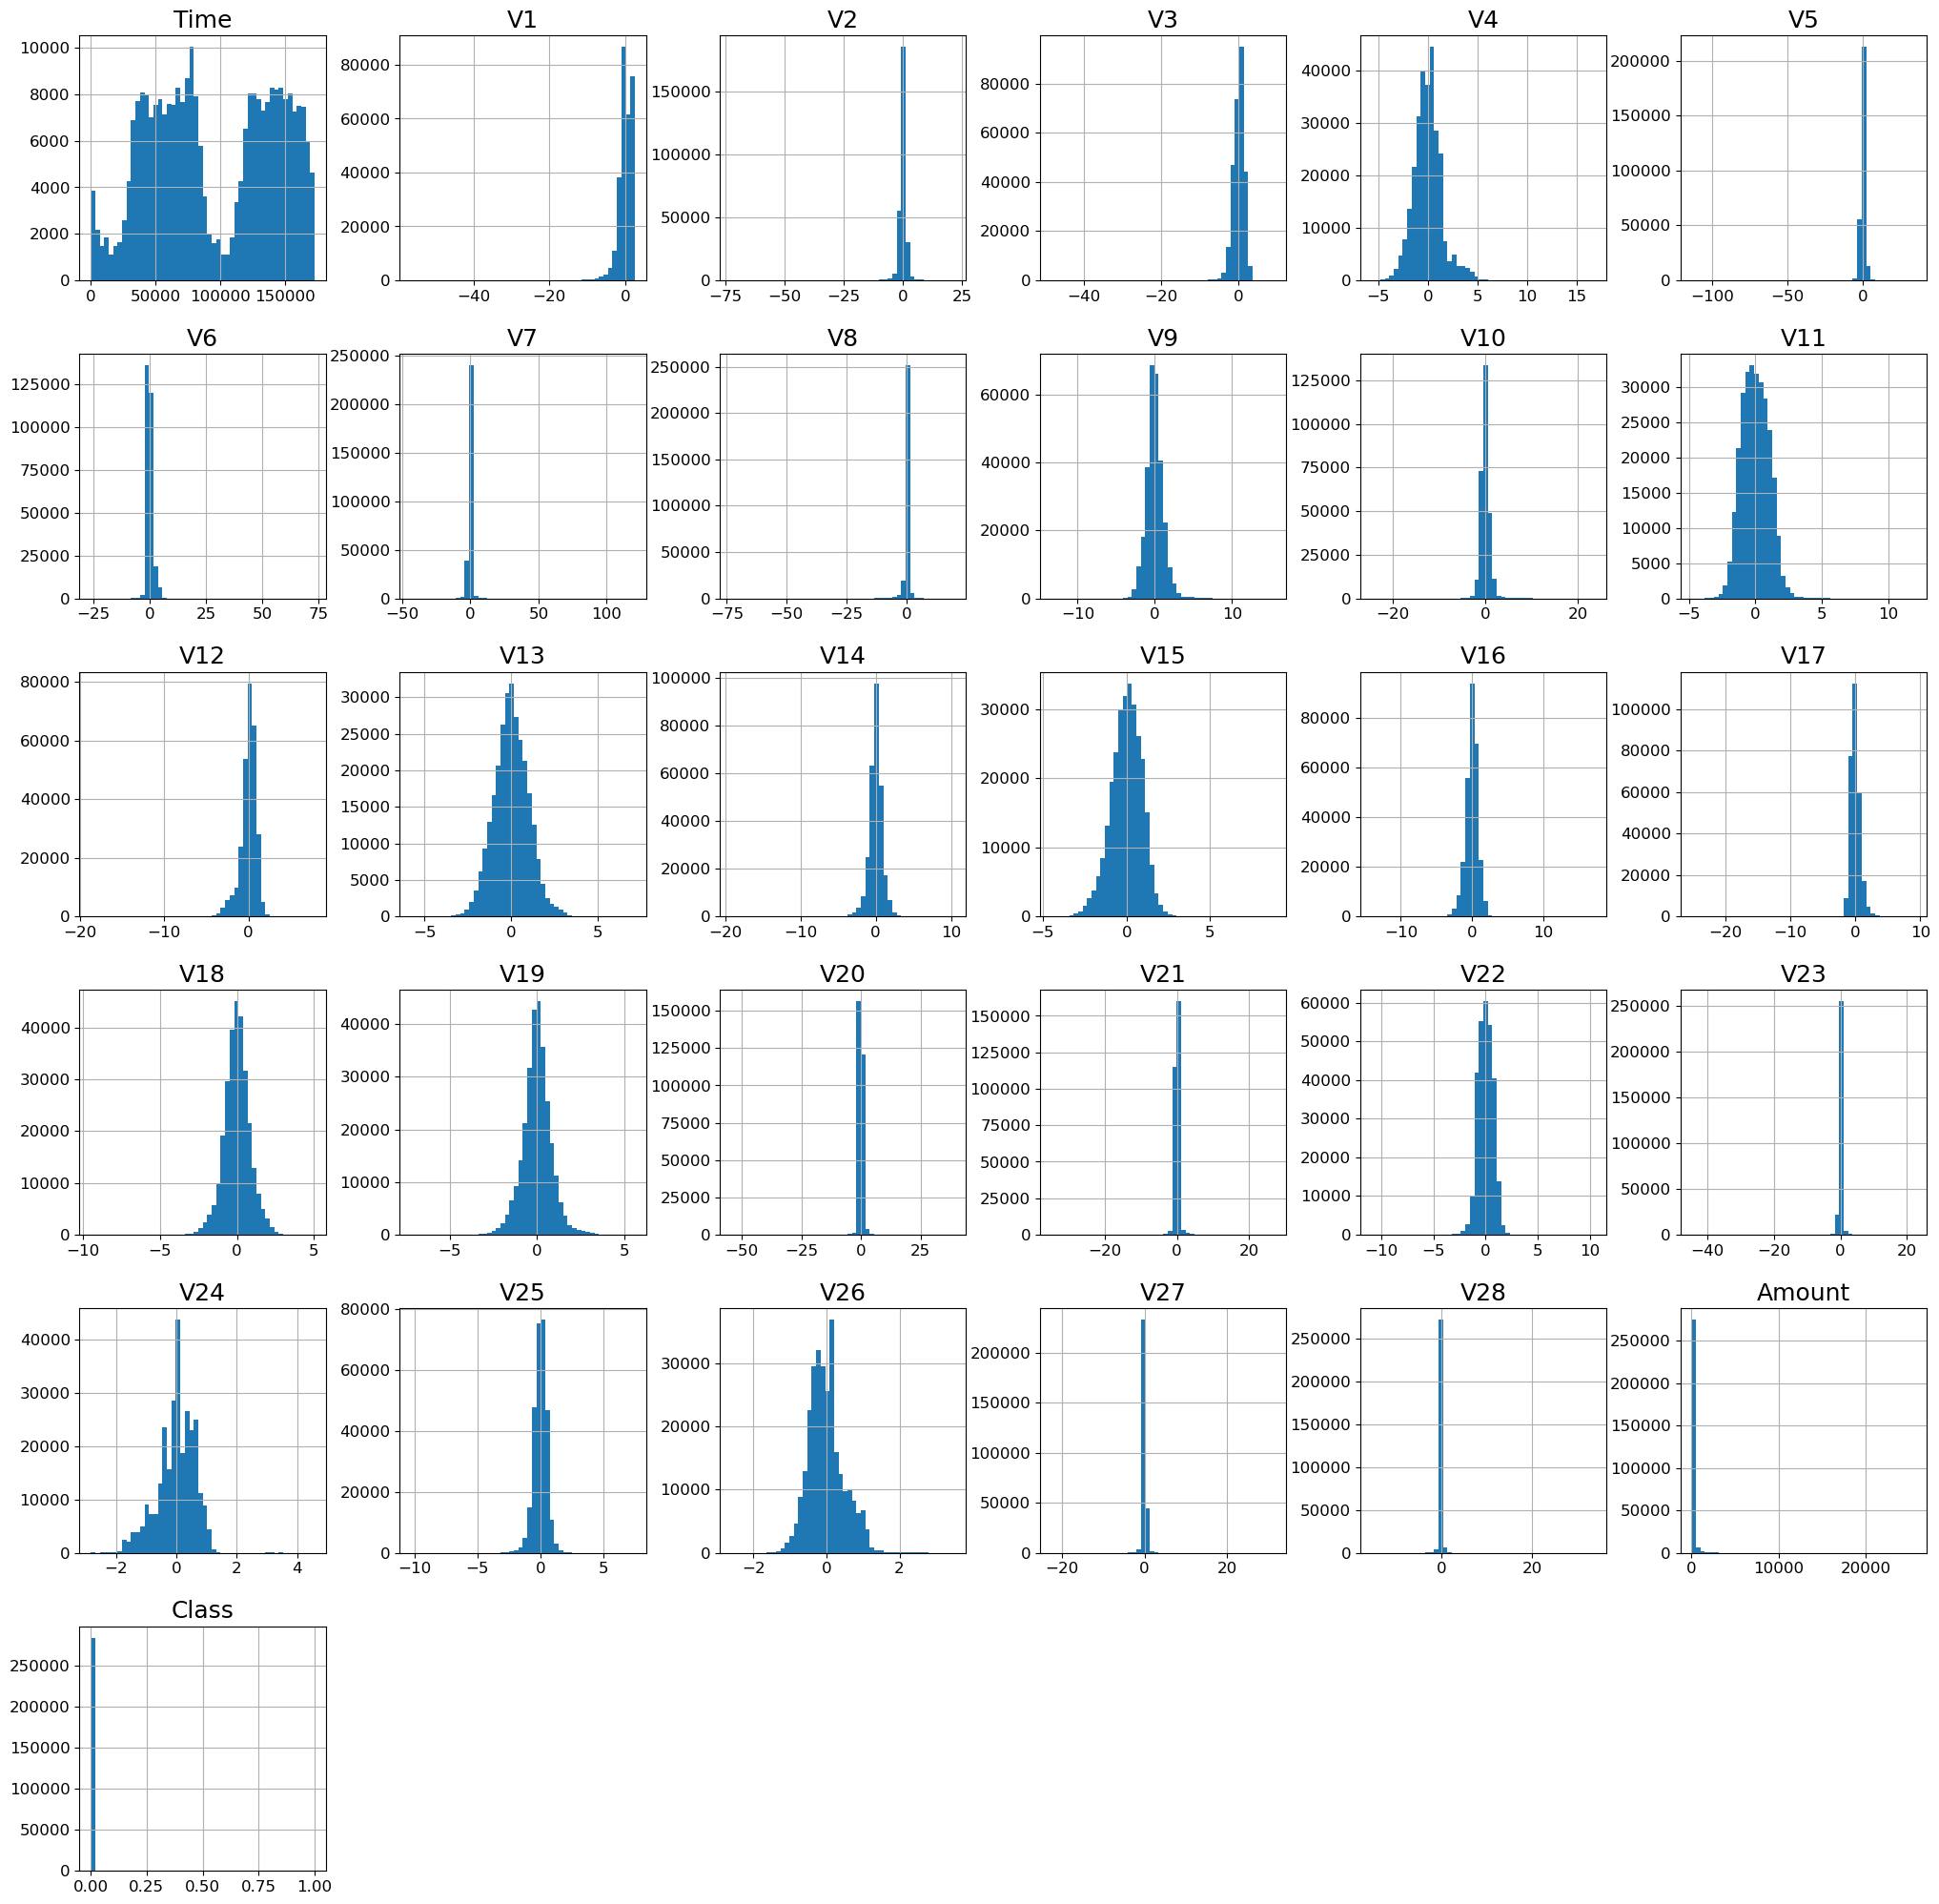

In [19]:
# the next 5 lines define the default font sizes
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=18)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

df.hist(bins=50, figsize=(25, 25) , grid = True)
plt.show()

 From the previous Visualization all feature are shaped normal except time and amount 

### Correlation Matrices
Correlation matrices are the essence of understanding our data. We want to know if there are features that influence heavily in whether a specific transaction is a fraud.

<Axes: >

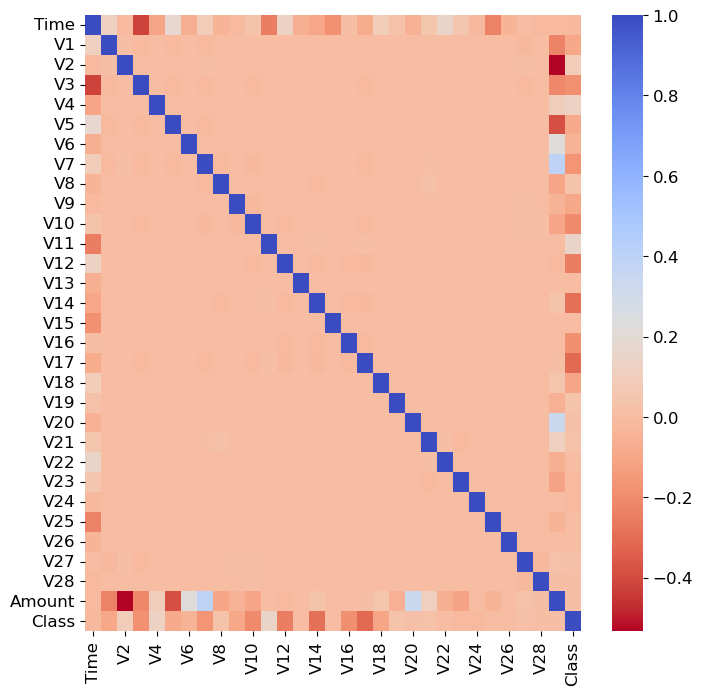

In [20]:
corr = df.corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20})

In the HeatMap we can clearly see that most of the features do not correlate to other features but there are some features that either has a positive or a negative correlation with each other. For example, V2 and V5 are highly negatively correlated with the feature called Amount. We also see some correlation with V20,V7 and Amount. This gives us a deeper understanding of the Data available to us.

### 4. Feature Selection

In [21]:
X = df.drop(['Class'], axis = 1)
Y = df.Class

### 5. Train/Test split and check data distribution of both train/test datasets

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=11)

In [23]:
X_train.shape, X_test.shape

((198608, 30), (85118, 30))

In [24]:
# label data distribution of train dataset
y_train.value_counts()

Class
0    198266
1       342
Name: count, dtype: int64

In [25]:
# label data distribution of test dataset
y_test.value_counts()

Class
0    84987
1      131
Name: count, dtype: int64

### 6. Perform PCA and check how data is distributed in raw dataset using 2D/3D sctter plot

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


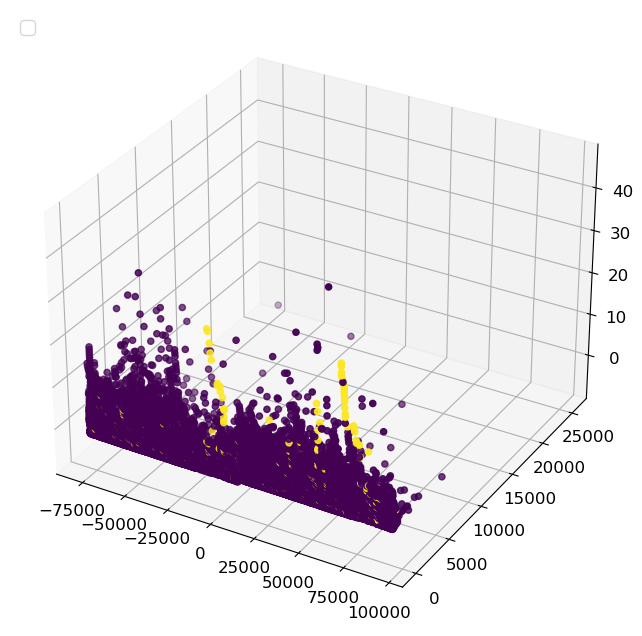

In [26]:
# to generate 3D scatter plot
pca = PCA(3)
pca_data = pd.DataFrame(pca.fit_transform(X_train),columns=['PC1','PC2','PC3'])
pca_data['Transaction Type'] = y_train.to_list()

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection = '3d')

x = pca_data.PC1
y = pca_data.PC2
z = pca_data.PC3

ax.scatter(x, y, z, c=pca_data['Transaction Type'])
plt.legend(loc=2)

plt.show()

<Axes: xlabel='PC1', ylabel='PC2'>

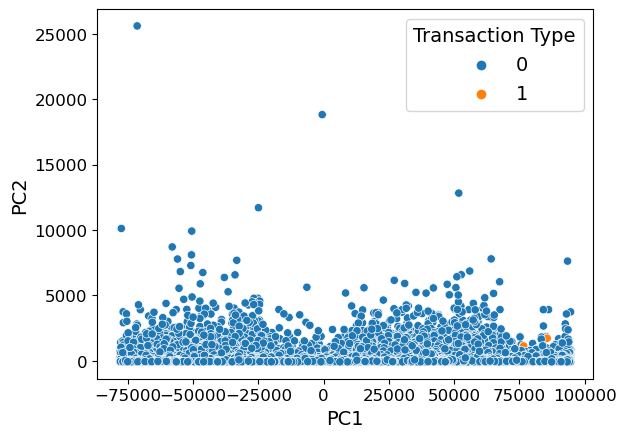

In [27]:
# to generate 2D scatter plot
pca = PCA(2)
pca_data = pd.DataFrame(pca.fit_transform(X_train),columns=['PC1','PC2'])
pca_data['Transaction Type'] = y_train.to_list()

sns.scatterplot(x="PC1",y="PC2",hue="Transaction Type",data=pca_data)

### 7. Base model

In [28]:
confusion_matrices = []
classification_reports = []

### LogisticReression

In [29]:
model = LogisticRegression()
model.fit(X_train, y_train)
model_score = model.score(X_test, y_test)

c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [30]:
print("Base Model = ", model_score)

Base Model =  0.9988956507436735


In [31]:
test_pred = model.predict(X_test)
print(metrics.classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84987
           1       0.64      0.66      0.65       131

    accuracy                           1.00     85118
   macro avg       0.82      0.83      0.82     85118
weighted avg       1.00      1.00      1.00     85118



Confusion Matrix


<Axes: >

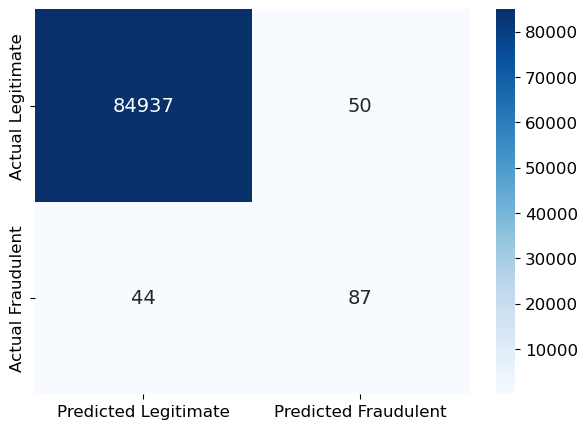

In [32]:
print("Confusion Matrix")
cm=metrics.confusion_matrix(y_test, test_pred, labels=[0,1])

df_cm = pd.DataFrame(cm, index = [i for i in ['Actual Legitimate', 'Actual Fraudulent']],
                  columns = [i for i in ['Predicted Legitimate', 'Predicted Fraudulent']])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt='g', cmap='Blues')

Out of a total of 131 fraudulent transactions, the model correctly identified 87 of them as fraudulent (66% Recall)


In [33]:
confusion_matrices.append(metrics.confusion_matrix(y_test, test_pred))

### RandomForest

In [34]:
rfc = RandomForestClassifier() 
rfc.fit(X_train, y_train) 
# predictions 
yPred = rfc.predict(X_test)
print(metrics.classification_report(y_test, yPred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84987
           1       0.96      0.73      0.83       131

    accuracy                           1.00     85118
   macro avg       0.98      0.87      0.92     85118
weighted avg       1.00      1.00      1.00     85118



Confusion Matrix


<Axes: >

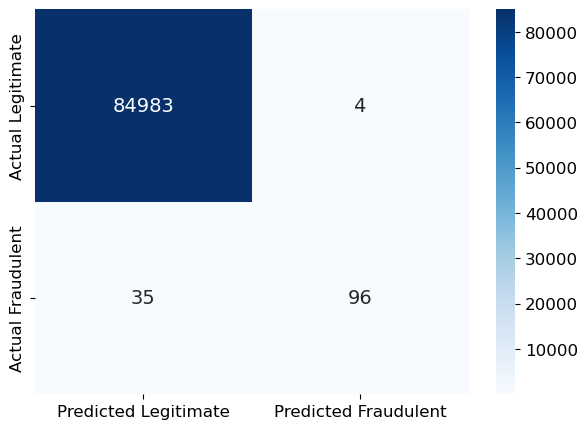

In [35]:
print("Confusion Matrix")
cm=metrics.confusion_matrix(y_test, yPred, labels=[0,1])

df_cm = pd.DataFrame(cm, index = [i for i in ['Actual Legitimate', 'Actual Fraudulent']],
                  columns = [i for i in ['Predicted Legitimate', 'Predicted Fraudulent']])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt='g', cmap='Blues')

Out of a total of 131 fraudulent transactions, the model correctly identified 97 of them as fraudulent (74% Recall)


In [36]:
confusion_matrices.append(metrics.confusion_matrix(y_test, yPred))

### IsolationForest

In [37]:
model_if = IsolationForest(n_estimators = 500, max_samples=len(X_train) , random_state=42 , verbose=0)
model_if.fit(X_train, y_train)

IsolationForest(max_samples=198608, n_estimators=500, random_state=42)

In [38]:
y_pred_if = model_if.predict(X_test)

y_pred_if[y_pred_if==1] = 0
y_pred_if[y_pred_if==-1] = 1

print(metrics.classification_report(y_test, y_pred_if))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84987
           1       0.25      0.33      0.28       131

    accuracy                           1.00     85118
   macro avg       0.62      0.66      0.64     85118
weighted avg       1.00      1.00      1.00     85118



Confusion Matrix


<Axes: >

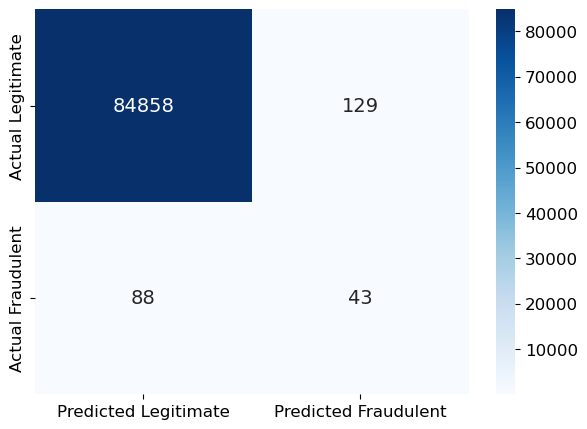

In [39]:
print("Confusion Matrix")
cm=metrics.confusion_matrix(y_test, y_pred_if, labels=[0,1])

df_cm = pd.DataFrame(cm, index = [i for i in ['Actual Legitimate', 'Actual Fraudulent']],
                  columns = [i for i in ['Predicted Legitimate', 'Predicted Fraudulent']])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt='g', cmap='Blues')

In [40]:
confusion_matrices.append(metrics.confusion_matrix(y_test, y_pred_if))

Out of a total of 131 fraudulent transactions, the model correctly identified 43 of them as fraudulent (33% Recall)


In [41]:
def calculate_summary_metrics(conf_matrix):
    tn, fp, fn, tp = conf_matrix.ravel()
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    f1_score = 2 * (precision * recall) / (precision + recall)
    return tp, fp, tn, fn, accuracy, precision, recall, f1_score

summary_metrics = []

for conf_matrix in confusion_matrices:
    metrics = calculate_summary_metrics(conf_matrix)
    summary_metrics.append(metrics)
    
metrics_df = pd.DataFrame(summary_metrics, columns=['TP', 'FP', 'TN', 'FN', 'Accuracy', 'Precision', 'Recall', 'F1_score'])


metrics_df['Base_Model']=['Logistic Regration', 'Random Forest', 'Isolation Forest']

metrics_df.set_index('Base_Model', inplace=True)

In [42]:
metrics_df

,TP,FP,TN,FN,Accuracy,Precision,Recall,F1_score
Base_Model,,,,,,,,
Logistic Regration,87,50,84937,44,0.998896,0.635036,0.664122,0.649254
Random Forest,96,4,84983,35,0.999542,0.960000,0.732824,0.831169
Isolation Forest,43,129,84858,88,0.997451,0.250000,0.328244,0.283828


Text(0.5, 1.0, 'Comparison of True Positives of all experiments')

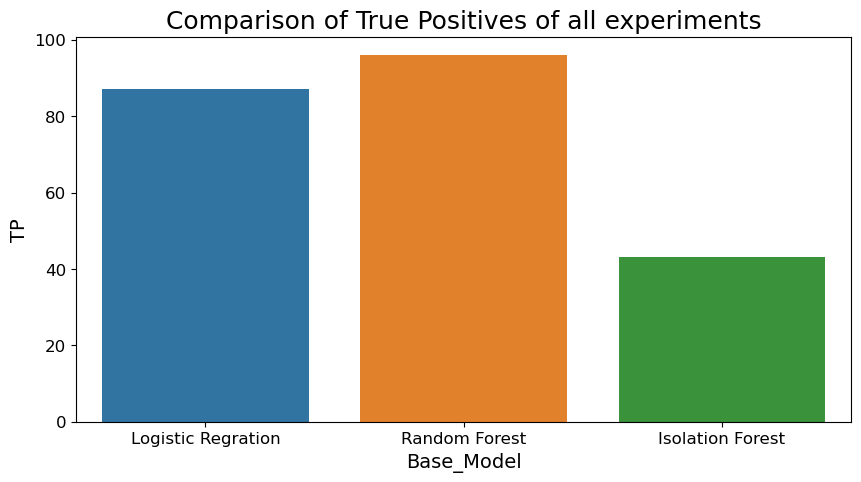

In [43]:
plt.figure(figsize=(10, 5))
sns.barplot(x=metrics_df.index, y=metrics_df['TP'])
plt.title("Comparison of True Positives of all experiments")

Text(0.5, 1.0, 'Comparison of False Positives of all experiments')

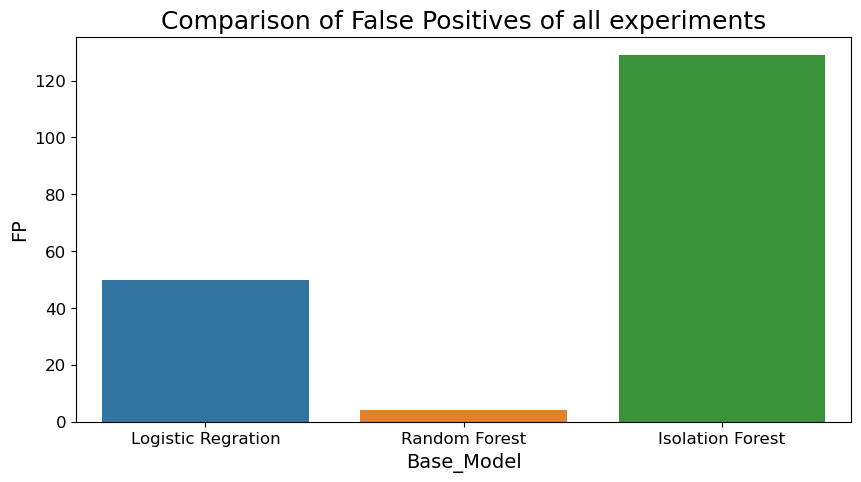

In [44]:
plt.figure(figsize=(10, 5))
sns.barplot(x=metrics_df.index, y=metrics_df['FP'])
plt.title("Comparison of False Positives of all experiments")

Text(0.5, 1.0, 'Comparison of False Negatives of all experiments')

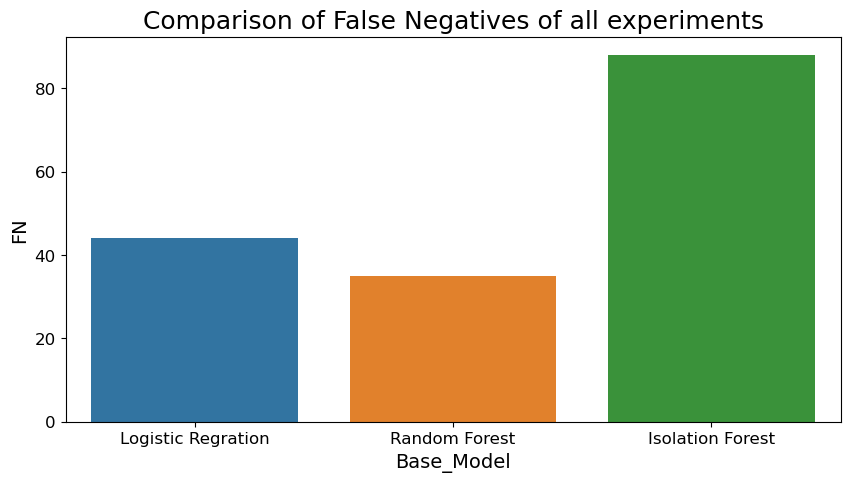

In [45]:
plt.figure(figsize=(10, 5))
sns.barplot(x=metrics_df.index, y=metrics_df['FN'])
plt.title("Comparison of False Negatives of all experiments")

### SMOTE

In [46]:
confusion_matrices_SMOTE = []
classification_reports_SMOTE = []

c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\clust

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

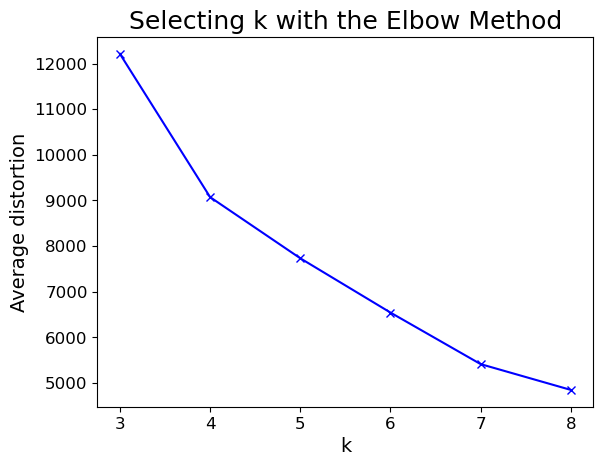

In [47]:
from scipy.spatial.distance import cdist
clusters=range(3,9)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(X_train)
    prediction=model.predict(X_train)
    meanDistortions.append(sum(np.min(cdist(X_train, model.cluster_centers_, 'euclidean'), axis=1)) / X_train.shape[0])


plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

In [48]:
sm = SMOTE(sampling_strategy = 1 ,k_neighbors = 4, random_state=1)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


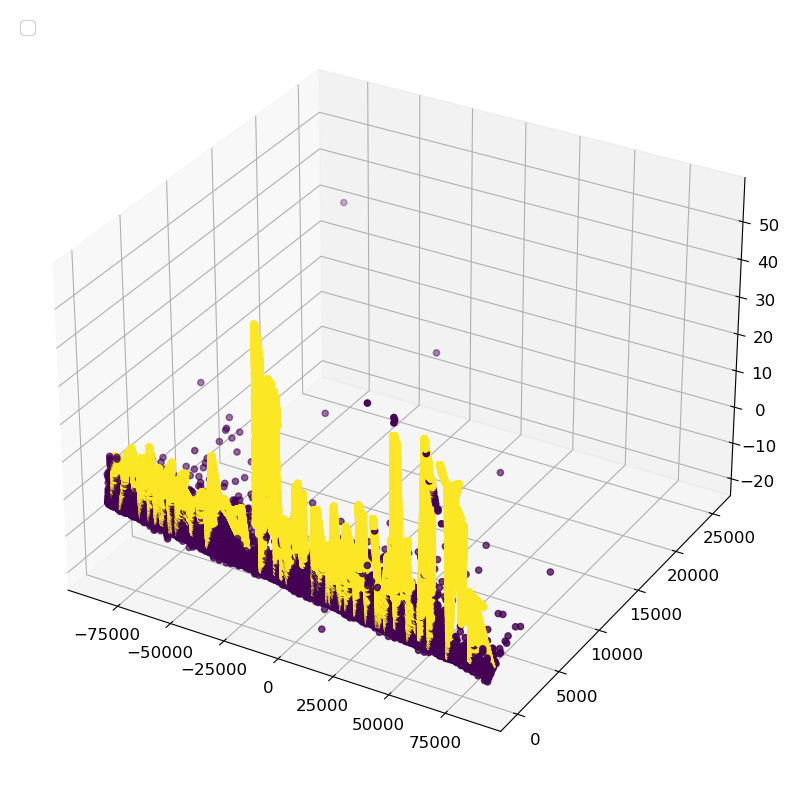

In [49]:
pca = PCA(3)
pca_data = pd.DataFrame(pca.fit_transform(X_train_res),columns=['PC1','PC2','PC3'])
pca_data['Transaction Type'] = y_train_res

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection = '3d')

x = pca_data.PC1
y = pca_data.PC2
z = pca_data.PC3

ax.scatter(x, y, z, c=pca_data['Transaction Type'])
plt.legend(loc=2)

plt.show()

<Axes: xlabel='PC1', ylabel='PC2'>

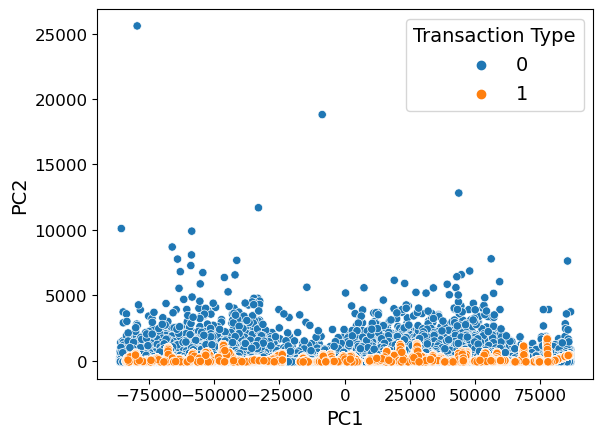

In [50]:
pca = PCA(2)
pca_data = pd.DataFrame(pca.fit_transform(X_train_res),columns=['PC1','PC2'])
pca_data['Transaction Type'] = y_train_res

sns.scatterplot(x="PC1",y="PC2",hue="Transaction Type",data=pca_data)

### LogisticRegression

In [51]:
undermodel_lg = LogisticRegression()
undermodel_lg.fit(X_train_res, y_train_res)
undermodel_lgscore = undermodel_lg.score(X_test, y_test)

c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [52]:
print("Random Under Sample = ", undermodel_lgscore)

Random Under Sample =  0.9788998801663573


In [53]:
from sklearn import metrics
test_pred_rf = undermodel_lg.predict(X_test)
print(metrics.classification_report(y_test, test_pred_rf))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     84987
           1       0.06      0.88      0.11       131

    accuracy                           0.98     85118
   macro avg       0.53      0.93      0.55     85118
weighted avg       1.00      0.98      0.99     85118



Confusion Matrix


<Axes: >

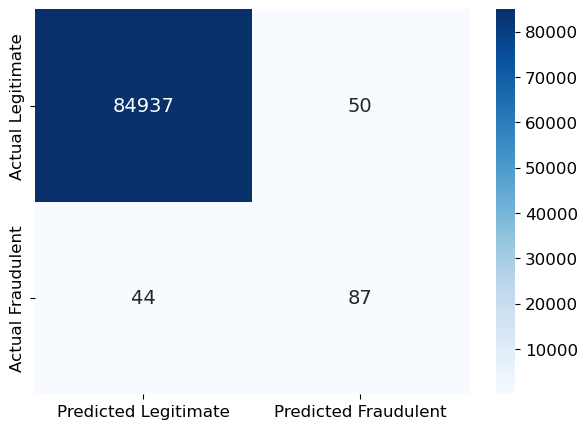

In [54]:
print("Confusion Matrix")
cm=metrics.confusion_matrix(y_test, test_pred, labels=[0,1])

df_cm = pd.DataFrame(cm, index = [i for i in ['Actual Legitimate', 'Actual Fraudulent']],
                  columns = [i for i in ['Predicted Legitimate', 'Predicted Fraudulent']])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt='g', cmap='Blues')

Out of a total of 131 fraudulent transactions, the model correctly identified 87 of them as fraudulent (88% Recall)


In [55]:
confusion_matrices_SMOTE.append(metrics.confusion_matrix(y_test, test_pred))

### ISOLATIONFOREST

In [56]:
model_if = IsolationForest(n_estimators = 500, max_samples=len(X_train_res) , random_state=42 , verbose=0)
model_if.fit(X_train_res, y_train_res)

IsolationForest(max_samples=396532, n_estimators=500, random_state=42)

In [57]:
y_pred_if = model_if.predict(X_test)



In [58]:
y_pred_if[y_pred_if==1] = 0
y_pred_if[y_pred_if==-1] = 1

In [59]:
print(metrics.classification_report(y_test, y_pred_if))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84987
           1       0.05      0.05      0.05       131

    accuracy                           1.00     85118
   macro avg       0.52      0.53      0.52     85118
weighted avg       1.00      1.00      1.00     85118



Confusion Matrix


<Axes: >

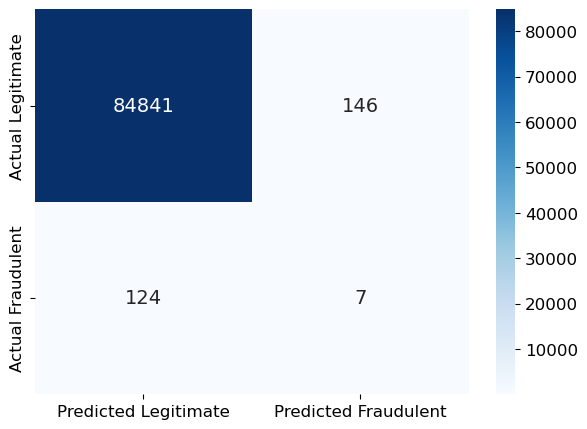

In [60]:
print("Confusion Matrix")
cm=metrics.confusion_matrix(y_test, y_pred_if, labels=[0,1])

df_cm = pd.DataFrame(cm, index = [i for i in ['Actual Legitimate', 'Actual Fraudulent']],
                  columns = [i for i in ['Predicted Legitimate', 'Predicted Fraudulent']])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt='g', cmap='Blues')

Out of a total of 131 fraudulent transactions, the model correctly identified only 27 of them as fraudulent (21% Recall)


In [61]:
confusion_matrices_SMOTE.append(metrics.confusion_matrix(y_test, y_pred_if))

### RandomForest

In [62]:
# random forest model creation 
rfc = RandomForestClassifier() 
rfc.fit(X_train_res, y_train_res)
rfc_score = rfc.score(X_test, y_test)
print("RandomForest score = ", rfc_score)


RandomForest score =  0.9995183157499001


In [63]:
# predictions 
yPred_rfc = rfc.predict(X_test)
# Classification report
print(metrics.classification_report(y_test, yPred_rfc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84987
           1       0.89      0.79      0.83       131

    accuracy                           1.00     85118
   macro avg       0.94      0.89      0.92     85118
weighted avg       1.00      1.00      1.00     85118



Confusion Matrix


<Axes: >

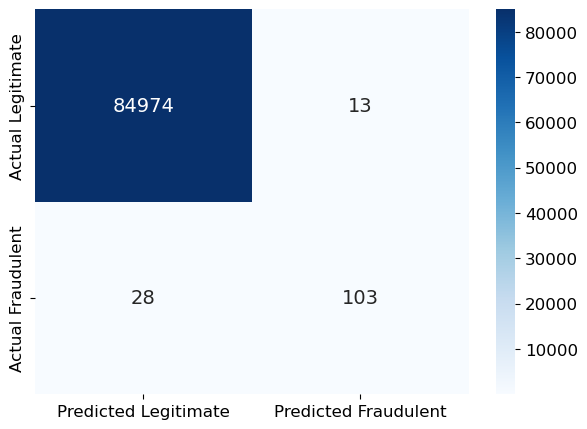

In [64]:
print("Confusion Matrix")
cm=metrics.confusion_matrix(y_test, yPred_rfc, labels=[0,1])

df_cm = pd.DataFrame(cm, index = [i for i in ['Actual Legitimate', 'Actual Fraudulent']],
                  columns = [i for i in ['Predicted Legitimate', 'Predicted Fraudulent']])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt='g', cmap='Blues')

Out of a total of 131 fraudulent transactions, the model correctly identified 103 of them as fraudulent (79% Recall)


In [65]:
confusion_matrices_SMOTE.append(metrics.confusion_matrix(y_test, yPred_rfc))

In [66]:
def calculate_summary_metrics(conf_matrix):
    tn, fp, fn, tp = conf_matrix.ravel()
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    f1_score = 2 * (precision * recall) / (precision + recall)
    return tp, fp, tn, fn, accuracy, precision, recall, f1_score

summary_metrics = []

for conf_matrix in confusion_matrices_SMOTE:
    metrics = calculate_summary_metrics(conf_matrix)
    summary_metrics.append(metrics)
    
metrics_df = pd.DataFrame(summary_metrics, columns=['TP', 'FP', 'TN', 'FN', 'Accuracy', 'Precision', 'Recall', 'F1_score'])


metrics_df['SMOTE_Model']=['Logistic Regration', 'Isolation Forest', 'Random Forest']

metrics_df.set_index('SMOTE_Model', inplace=True)

metrics_df


,TP,FP,TN,FN,Accuracy,Precision,Recall,F1_score
SMOTE_Model,,,,,,,,
Logistic Regration,87,50,84937,44,0.998896,0.635036,0.664122,0.649254
Isolation Forest,7,146,84841,124,0.996828,0.045752,0.053435,0.049296
Random Forest,103,13,84974,28,0.999518,0.887931,0.786260,0.834008


Text(0.5, 1.0, 'Comparison of True Positives of all experiments')

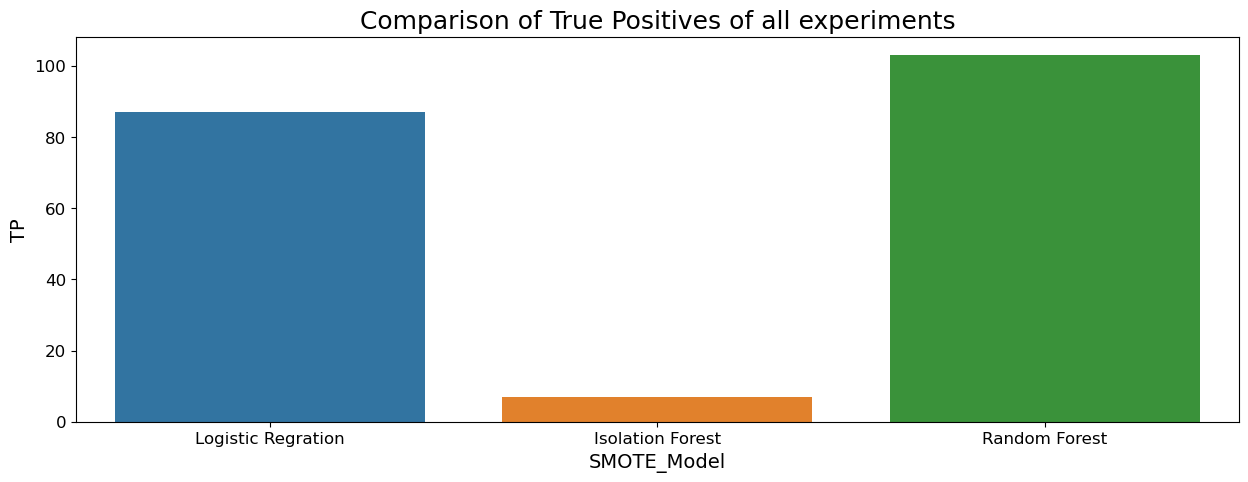

In [67]:
plt.figure(figsize=(15, 5))
sns.barplot(x=metrics_df.index, y=metrics_df['TP'])
plt.title("Comparison of True Positives of all experiments")

Text(0.5, 1.0, 'Comparison of False Positives of all experiments')

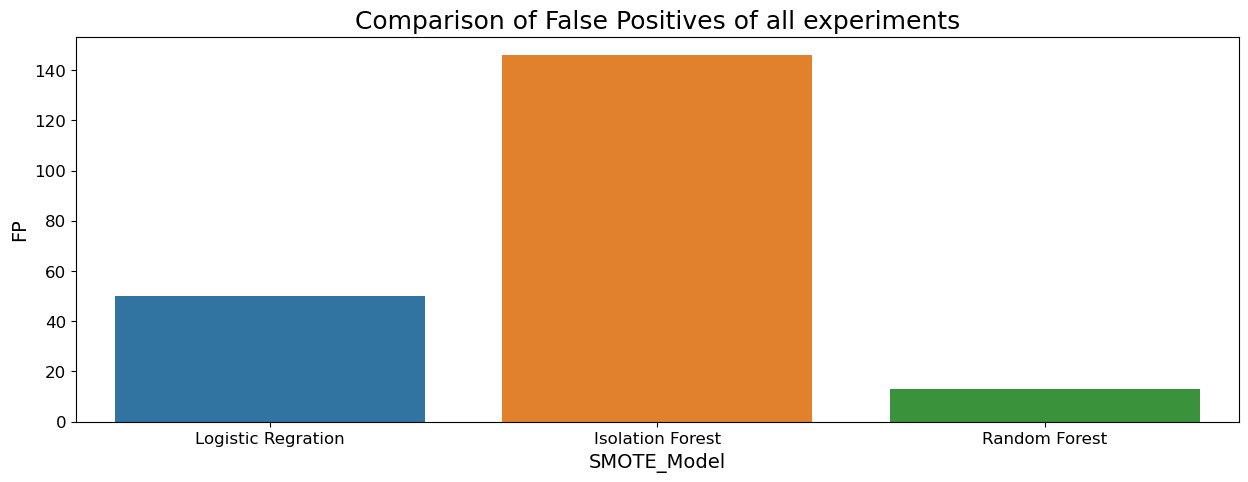

In [68]:
plt.figure(figsize=(15, 5))
sns.barplot(x=metrics_df.index, y=metrics_df['FP'])
plt.title("Comparison of False Positives of all experiments")

Text(0.5, 1.0, 'Comparison of False Negatives of all experiments')

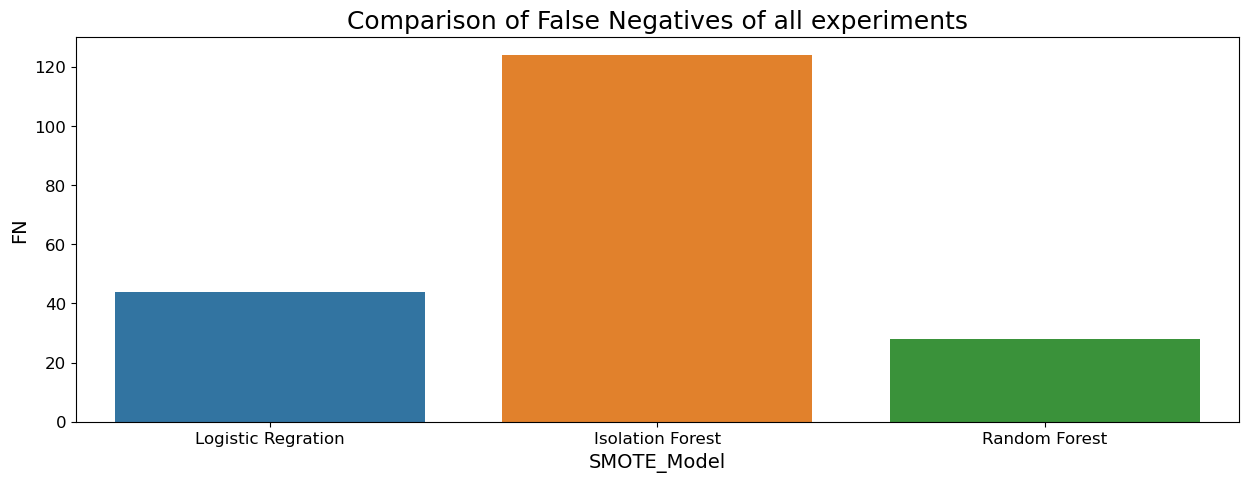

In [69]:
plt.figure(figsize=(15, 5))
sns.barplot(x=metrics_df.index, y=metrics_df['FN'])
plt.title("Comparison of False Negatives of all experiments")

Conclusion : 
1. In base (imbalance data) We perform 3 model Logistic Regration , Random Forest, Isolation forest in this three model Random Forest perform  well in all Evaluation matrics.
  Accuracy : 99% , Precision : 95%, Recall :74% & F1 Score : 83%
2. After Balance the dataset using SMOT Technique Random Forest Perform well compair to rest alogorythems.
  Accuracy : 99% , Precision :89%, Recall :79% & F1 Score : 84%
  But if we look at other Algorythems, Logistic Regration perform avg but Isolation forest give very bad Pridiction.
3. In compair to Balance & Imbalance dataset Accuracy is same but Pricision & recall are change due to trade off Type 1 & Type 2 Error
   But if we look at F1 Score Balance dataset perform best.
4. Random Forest is best performing model in the balance dataset.



In [70]:
# we are tuning three hyperparameters right now, we are passing the different values for both parameters
param_grid = { 
    'n_estimators': [25, 50, 100], 
    'max_features': ['auto','log2', None], 
    'max_depth': range(2,20,1),
    'max_leaf_nodes': range(1,10,1), 
}

In [71]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [72]:
rf = RandomForestClassifier()


In [74]:
# Perform randomized search
rf_random = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_grid,
    n_iter=100,
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)


In [76]:
rf_random.fit(X_train_res, y_train_res)
print(rf_random.best_estimator_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
45 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py", line 340, in fit
    self._validate_params()
  File "c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\Admin\anaconda3\Lib\site-packag

RandomForestClassifier(max_depth=5, max_features=None, max_leaf_nodes=9,
                       n_estimators=50)


In [77]:
rand_clf=RandomForestClassifier(max_depth=5, max_features=None, max_leaf_nodes=9,
                       n_estimators=50)

rand_clf.fit(X_train_res, y_train_res)

RandomForestClassifier(max_depth=5, max_features=None, max_leaf_nodes=9,
                       n_estimators=50)

In [78]:
rfc_score = rand_clf.score(X_test, y_test)
print("RandomForest score = ", rfc_score)

RandomForest score =  0.9759980262694142


In [83]:
# Saving the model
import pickle
# Save the trained model as a pickle string.
save_model =pickle.dumps(rand_clf)
# Load the pickled model
Rf_from_pickle =pickle.loads(save_model)

# Rf_from_pickle


In [85]:
from sklearn import metrics
# predictions 
yPred_rf =Rf_from_pickle.predict(X_test)
# Classification report
print(metrics.classification_report(y_test, yPred_rf))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     84987
           1       0.05      0.86      0.10       131

    accuracy                           0.98     85118
   macro avg       0.53      0.92      0.54     85118
weighted avg       1.00      0.98      0.99     85118



Confusion Matrix


<Axes: >

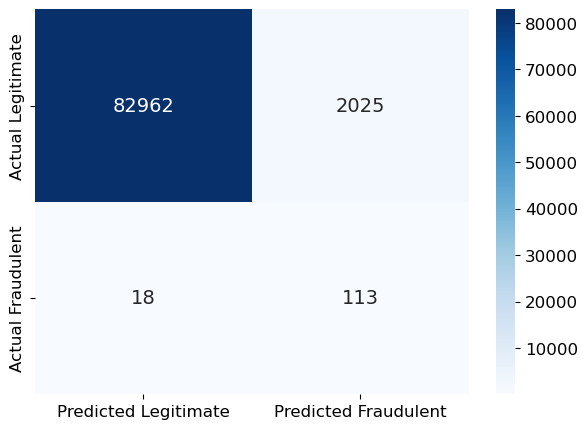

In [81]:
print("Confusion Matrix")
cm=metrics.confusion_matrix(y_test, yPred_rf, labels=[0,1])

df_cm = pd.DataFrame(cm, index = [i for i in ['Actual Legitimate', 'Actual Fraudulent']],
                  columns = [i for i in ['Predicted Legitimate', 'Predicted Fraudulent']])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt='g', cmap='Blues')

rf_auc : 0.9193841231398031


<function matplotlib.pyplot.show(close=None, block=None)>

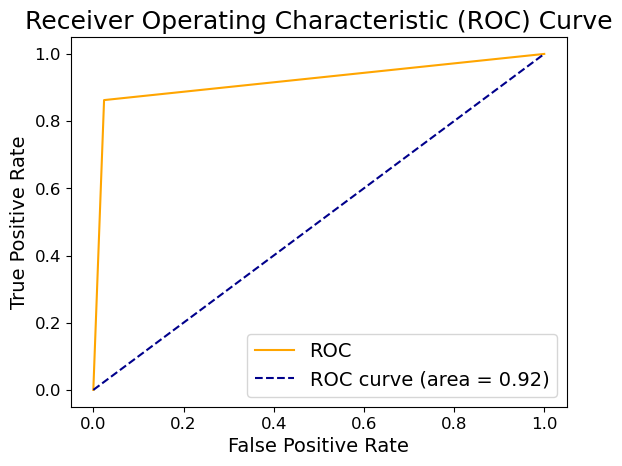

In [82]:
# Area Under Curve
from sklearn.metrics import roc_auc_score, roc_curve
ran_auc = roc_auc_score(y_test, yPred_rf)
print(f'rf_auc :',ran_auc)

fpr2, tpr2, thresholds2 = roc_curve(y_test, yPred_rf)

# plot ROC
plt.plot(fpr2, tpr2, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % ran_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show



Conclusion : 
 After The hyperparameter tunning model  performance is incress in  86% of Recall but precision & F1score are decresses.
 We check ROC AUC score it showing great result.  